# Figs/Movie of SST/Surface Velocities/TCC

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from scipy import stats

In [13]:
sst_ds = xr.open_dataset('/work5/stb/ERA5/sst.nc', chunks={})
tcc_ds = xr.open_dataset('/work5/stb/ERA5/tcc.nc', chunks={})
mslp_ds = xr.open_dataset('/work5/stb/ERA5/mslp.nc', chunks={})
u10_ds = xr.open_dataset('/work5/stb/ERA5/u10.nc', chunks={})
v10_ds = xr.open_dataset('/work5/stb/ERA5/v10.nc', chunks={})
mask_ds = xr.open_dataset('/work5/stb/ERA5/mask.nc', chunks={})
lcc_ds = xr.open_dataset('/work/Shanice.Bailey/ERA5/lcc.nc', chunks={})
glorys = xr.open_dataset('glorys_vars.nc', chunks={})

In [14]:
time_slice = dict(time=slice('2004', '2012'))
gom = dict(longitude=slice(-98, -81), latitude=slice(17.5, 31))

glorys_gom = glorys.sel(**gom).isel(depth=0).drop_vars('depth').sel(**time_slice)
sst = sst_ds.sea_surface_temperature.sel(**time_slice)
tcc = tcc_ds.total_cloud_cover.sel(**time_slice)
mslp = mslp_ds.mean_sea_level_pressure.sel(**time_slice)
u10 = u10_ds['10m_u_component_of_wind'].sel(**time_slice)
v10 = v10_ds['10m_v_component_of_wind'].sel(**time_slice)
mask = mask_ds.land_sea_mask
lcc = lcc_ds.lcc.sel(**time_slice)

sst_g = glorys_gom.thetao
ssh = glorys_gom.zos
u = glorys_gom.uo
v = glorys_gom.vo
eke = 0.5 * (u**2 + v**2)

In [15]:
sst

<xarray.DataArray 'sea_surface_temperature' (time: 78912, latitude: 55,
                                             longitude: 69)> Size: 1GB
dask.array<getitem, shape=(78912, 55, 69), dtype=float32, chunksize=(78912, 55, 69), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 631kB 2004-01-01 ... 2012-12-31T23:00:00

In [16]:
sst_g

<xarray.DataArray 'thetao' (time: 3288, latitude: 163, longitude: 205)> Size: 879MB
dask.array<getitem, shape=(3288, 163, 205), dtype=float64, chunksize=(3288, 163, 205), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 652B 17.5 17.58 17.67 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 820B -98.0 -97.92 -97.83 ... -81.08 -81.0
  * time       (time) datetime64[ns] 26kB 2004-01-01 2004-01-02 ... 2012-12-31
Attributes:
    long_name:      Temperature
    units:          degrees_C
    valid_max:      21306
    valid_min:      -32766
    standard_name:  sea_water_potential_temperature
    unit_long:      Degrees Celsius

## Trend maps

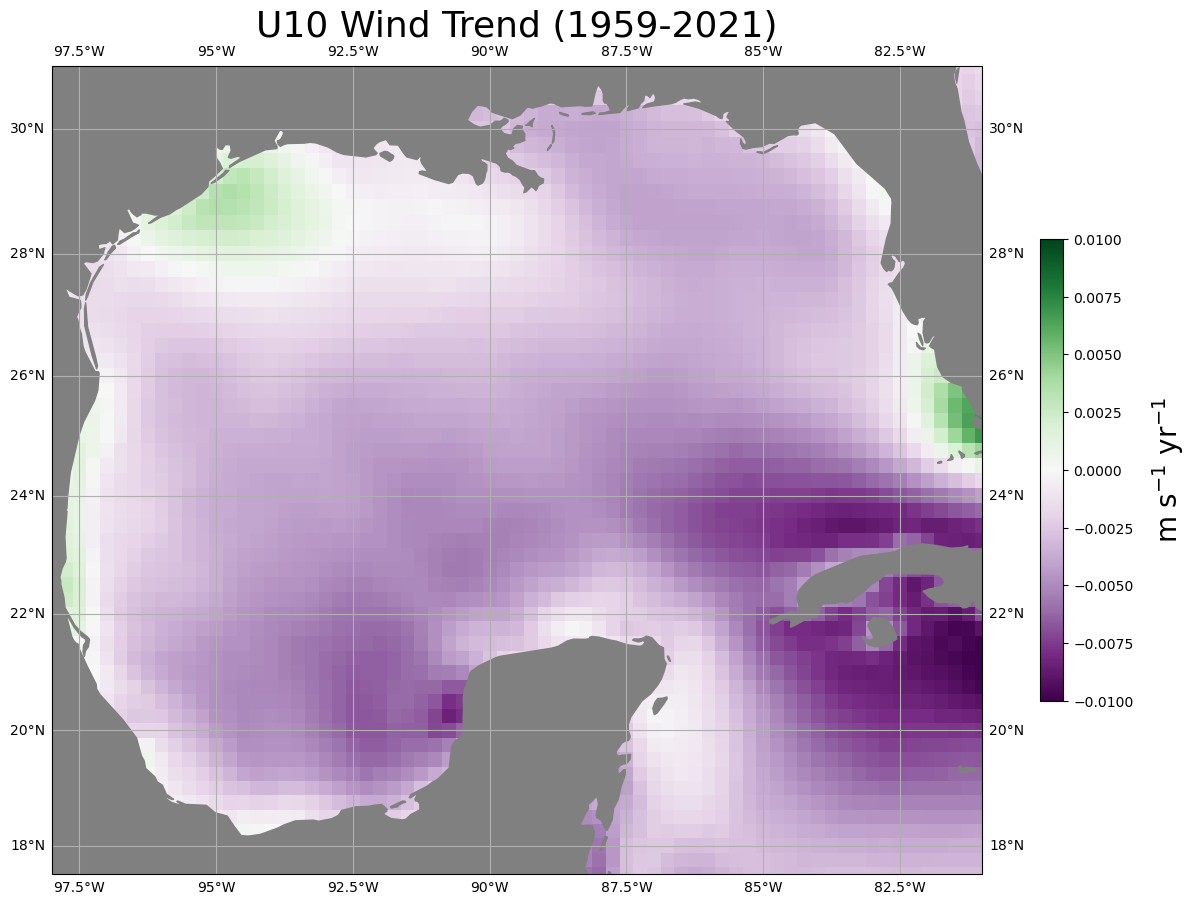

In [25]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_u.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.01, vmax=0.01)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"m s$^{-1}$ yr$^{-1}$", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('U10 Wind Trend (1959-2021)', fontsize=26);

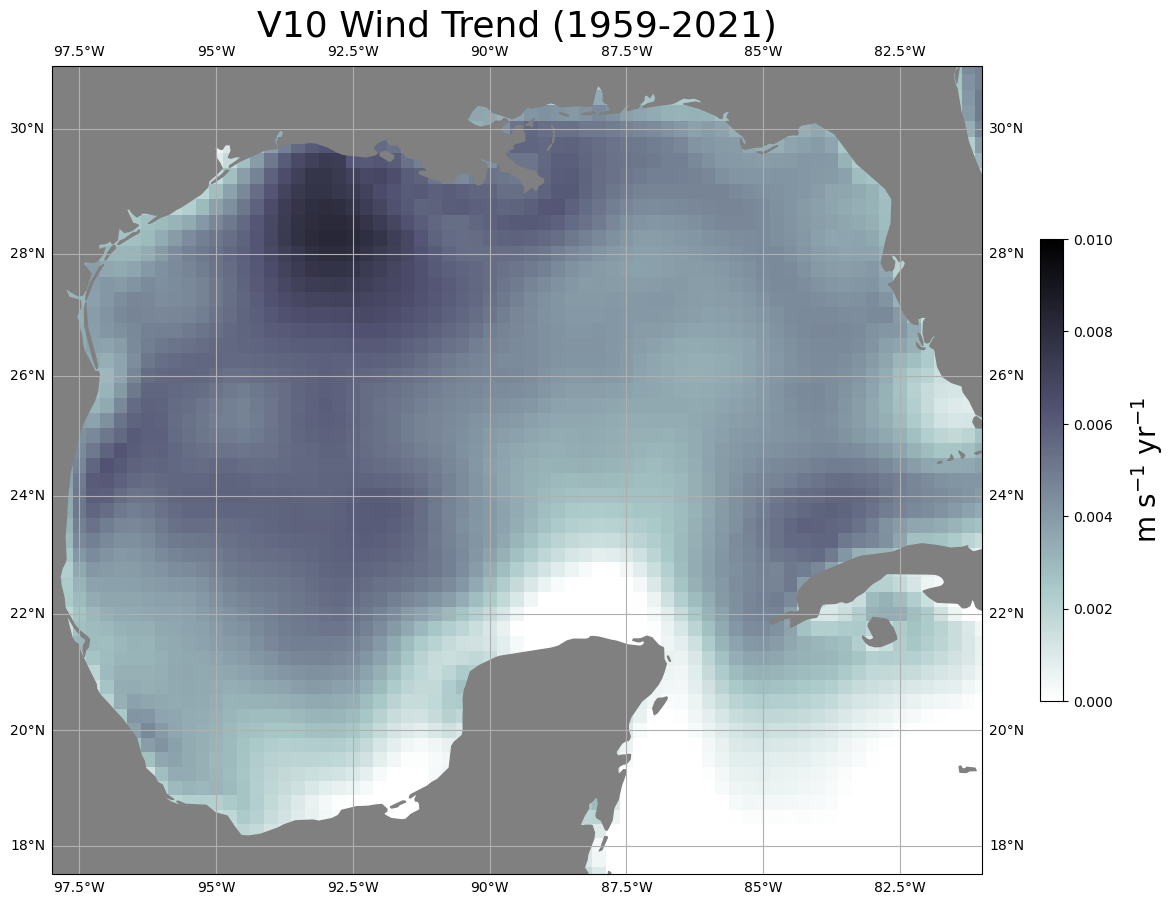

In [44]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_v.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='bone_r', vmin=0, vmax=0.01)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"m s$^{-1}$ yr$^{-1}$", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('V10 Wind Trend (1959-2021)', fontsize=26);

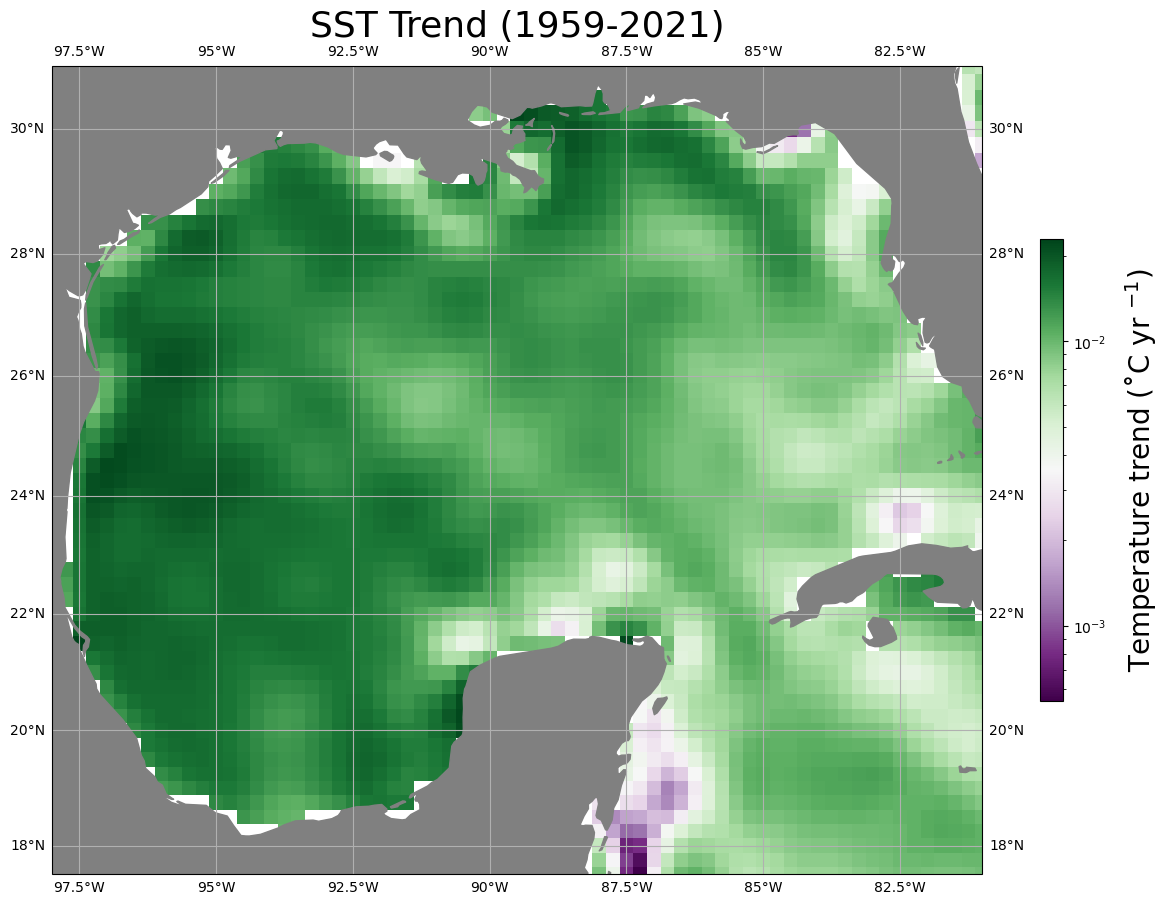

In [39]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_sst.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   norm=LogNorm(), cmap='PRGn')#, vmin=-0.02, vmax=0.02)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Trend (1959-2021)', fontsize=26);

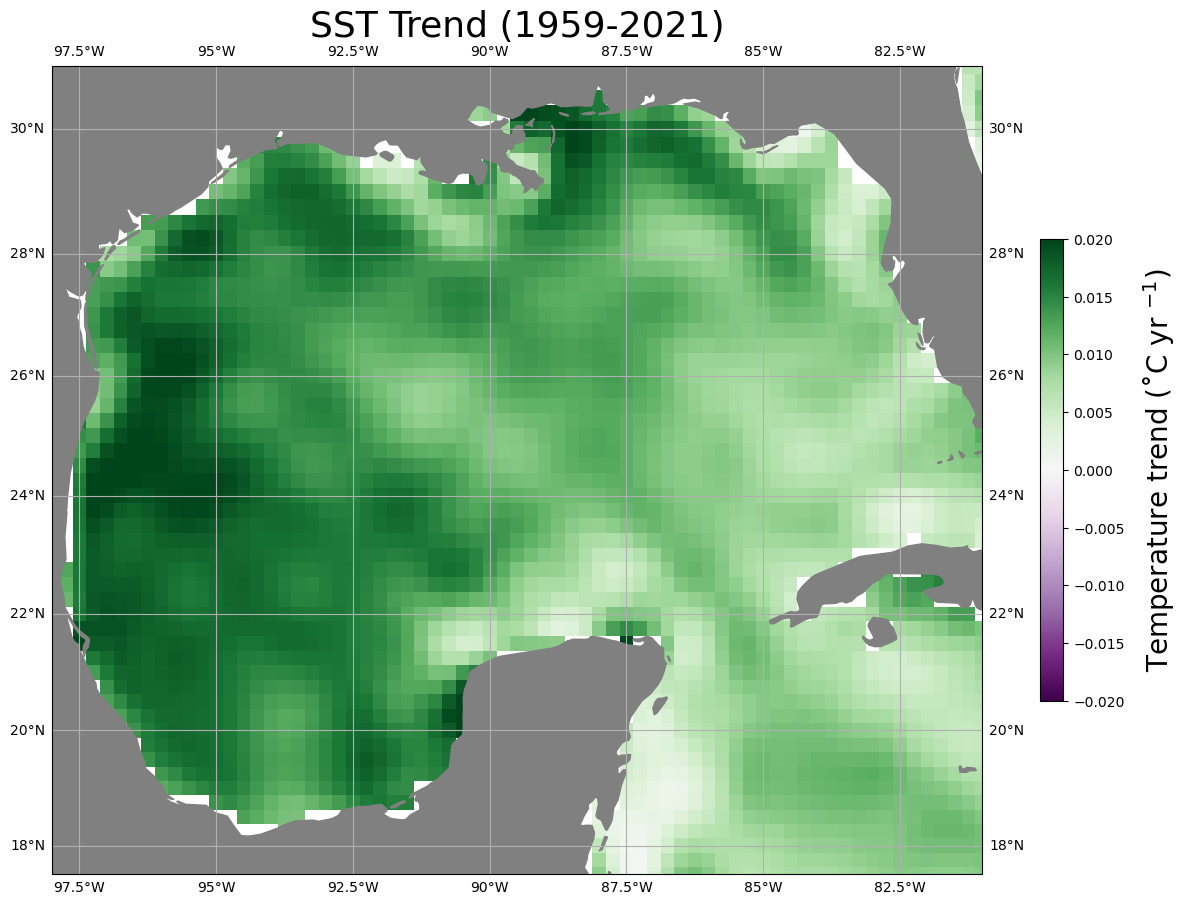

In [40]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_sst.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.02, vmax=0.02)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Trend (1959-2021)', fontsize=26);

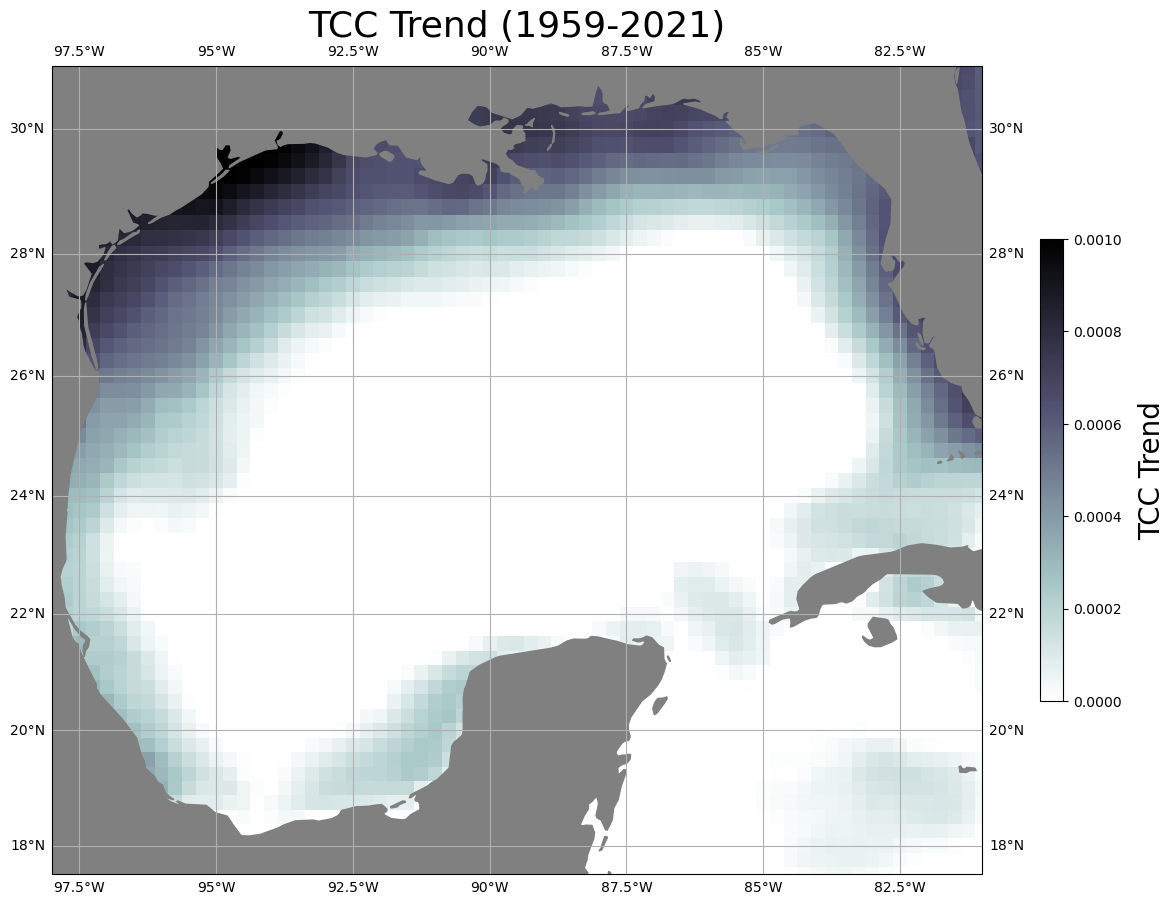

In [43]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_tcc.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='bone_r', vmin=0, vmax=1e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("TCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('TCC Trend (1959-2021)', fontsize=26);

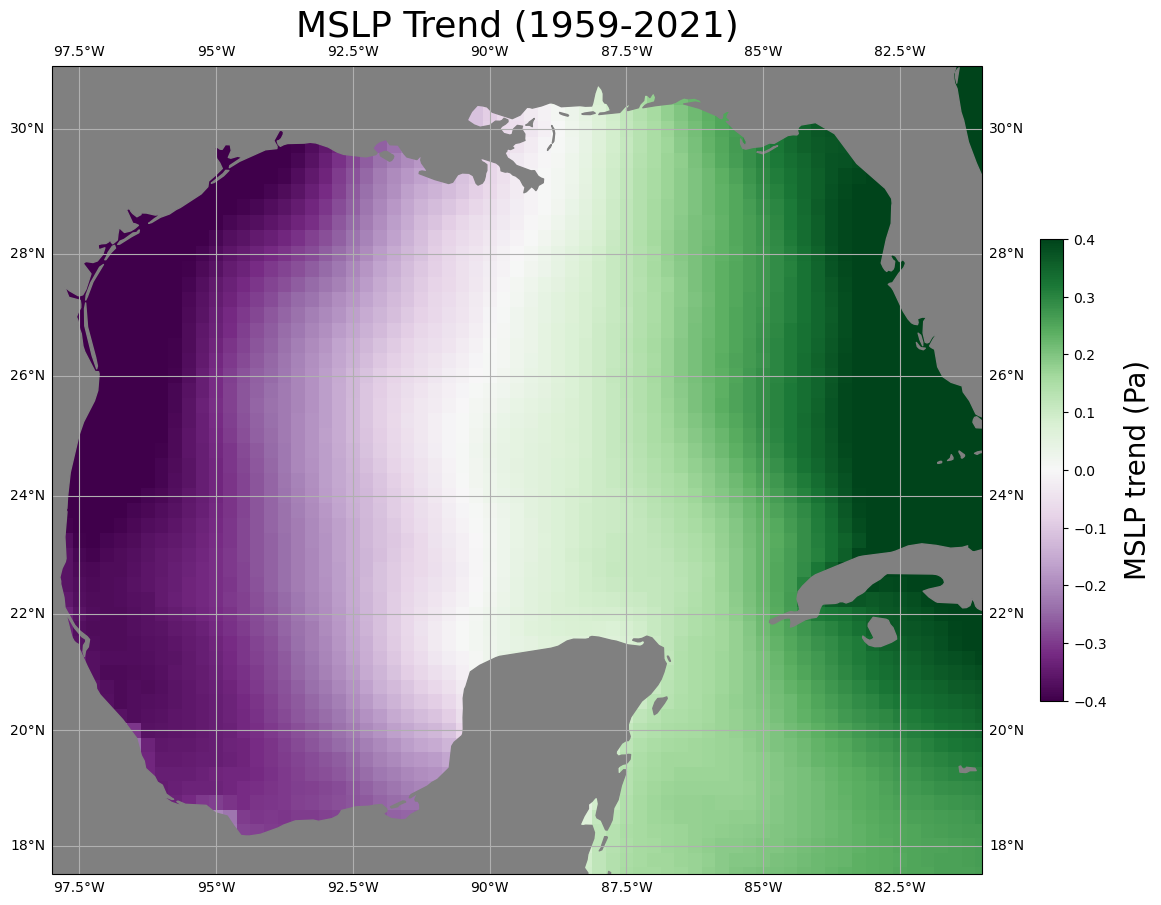

In [45]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_mslp.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.4, vmax=0.4)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("MSLP trend (Pa)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('MSLP Trend (1959-2021)', fontsize=26);

## Trend maps (2004-12)

In [17]:
#linear regression at every grid cell over time, so that we see trend rate at each grid pt
# Calculate the linear trend at each grid point
def trending(da):
    d = da.groupby('time.year').mean('time').polyfit('year', deg=1)
    return d

In [18]:
trend_sst_0412 = trending(sst)
trend_tcc_0412 = trending(tcc)
trend_u10_0412 = trending(u10)
trend_v10_0412 = trending(v10)
trend_mslp_0412 = trending(mslp)
trend_lcc_0412 = trending(lcc)

trend_sst_g_0412 = trending(sst_g)
trend_ssh_0412 = trending(ssh)
trend_u_0412 = trending(u)
trend_v_0412 = trending(v)
trend_eke_0412 = trending(eke)

In [19]:
trend_sst_0412

<xarray.Dataset> Size: 61kB
Dimensions:               (degree: 2, latitude: 55, longitude: 69)
Coordinates:
  * degree                (degree) int64 16B 1 0
  * latitude              (latitude) float32 220B 31.0 30.75 30.5 ... 17.75 17.5
  * longitude             (longitude) float32 276B 262.0 262.2 ... 278.8 279.0
Data variables:
    polyfit_coefficients  (degree, latitude, longitude) float64 61kB dask.array<chunksize=(2, 55, 69), meta=np.ndarray>

In [50]:
def plot_trend(da, title, cbar_label, v_min, v_max):
    proj = ccrs.Mercator() #with Mercator you can put lat lon values.
    fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))
    
    ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='0.5'))
    d = da.polyfit_coefficients[0]
    im = ax.pcolormesh(d.longitude, d.latitude, d, transform=ccrs.PlateCarree(), 
                       cmap='bwr', vmin=v_min, vmax=v_max)
    cb = fig.colorbar(im, ax=ax, shrink=0.4)
    cb.set_label(fr"{cbar_label}", labelpad=12, fontsize=20)
    
    g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    g1.xlabels_top = False
    g1.ylabels_right = False
    
    plt.title(f'{title}', fontsize=26);

In [51]:
print('Max: ', trend_sst_0412.polyfit_coefficients[0].max().values, '˚C/yr', 
      '\nMin: ', trend_sst_0412.polyfit_coefficients[0].min().values, '˚C/yr')

Max:  0.17608143488565253 ˚C/yr 
Min:  -0.06837371190388744 ˚C/yr


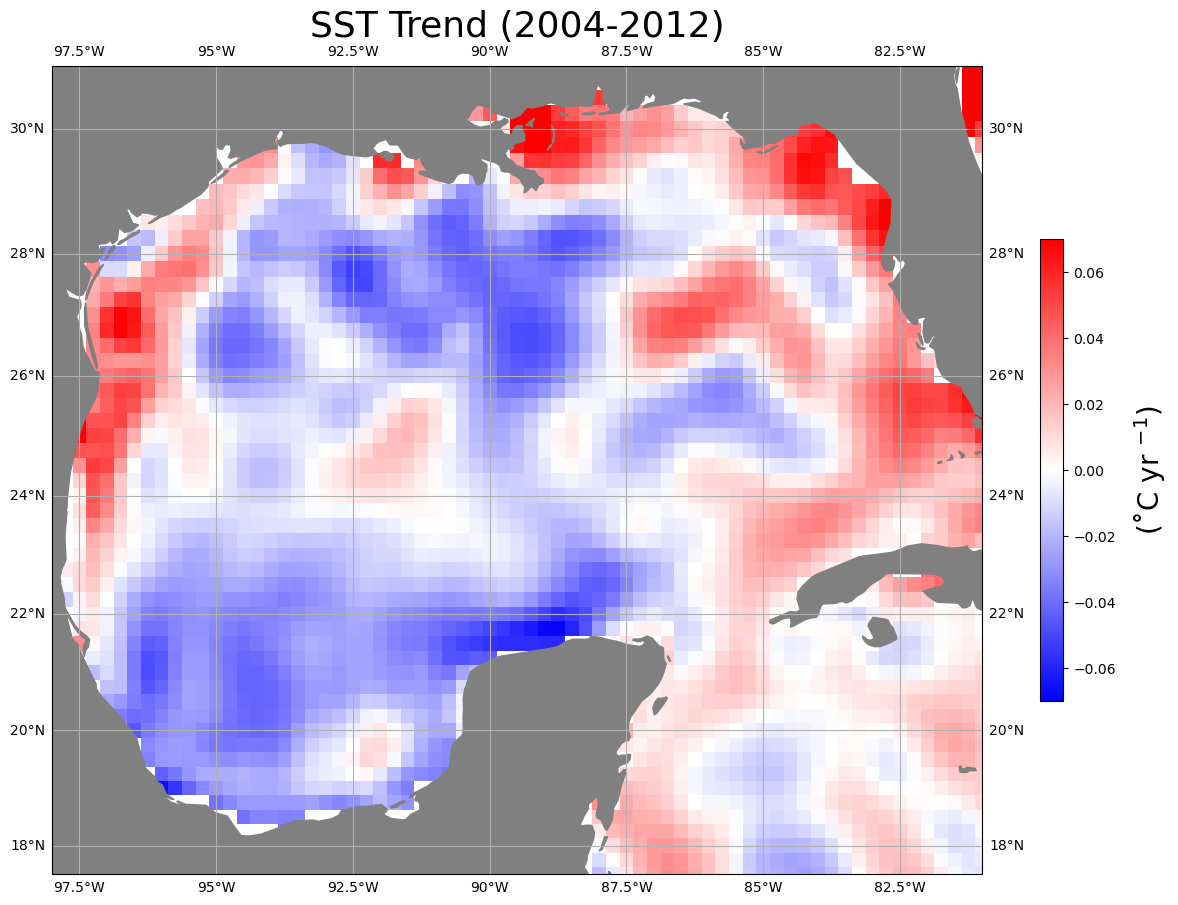

In [54]:
plot_trend(trend_sst_0412, 'SST Trend (2004-2012)', '(˚C yr $^{-1}$)', -0.07, 0.07)

In [55]:
print('Max: ', trend_tcc_0412.polyfit_coefficients[0].max().values, 'frac/yr', 
      '\nMin: ', trend_tcc_0412.polyfit_coefficients[0].min().values, 'frac/yr')

Max:  0.0031829054156938064 frac/yr 
Min:  -0.01157289097706497 frac/yr


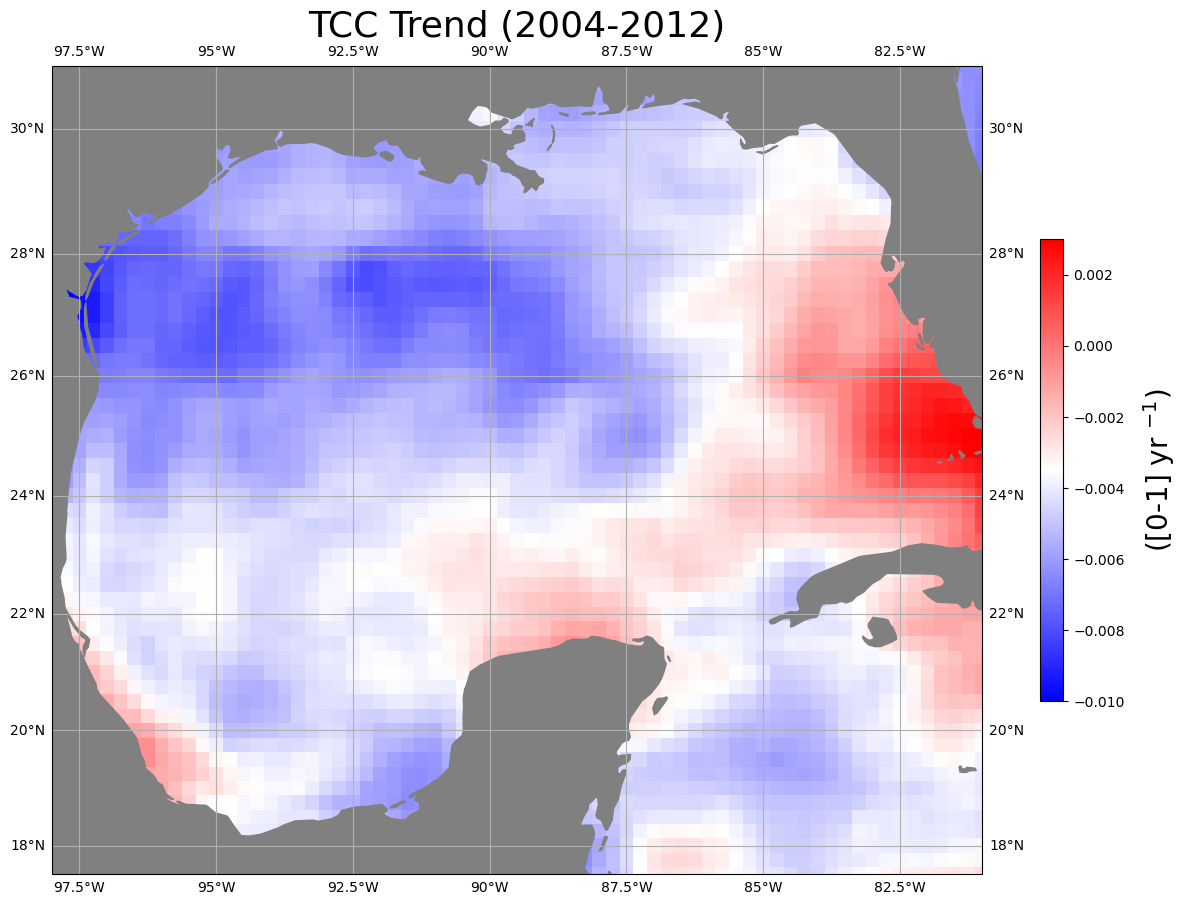

In [56]:
plot_trend(trend_tcc_0412, 'TCC Trend (2004-2012)', '([0-1] yr $^{-1}$)', -0.01, 0.003)

In [57]:
print('Max: ', trend_lcc_0412.polyfit_coefficients[0].max().values, 'frac/yr', 
      '\nMin: ', trend_lcc_0412.polyfit_coefficients[0].min().values, 'frac/yr')

Max:  0.0025459412532815758 frac/yr 
Min:  -0.006396698018378171 frac/yr


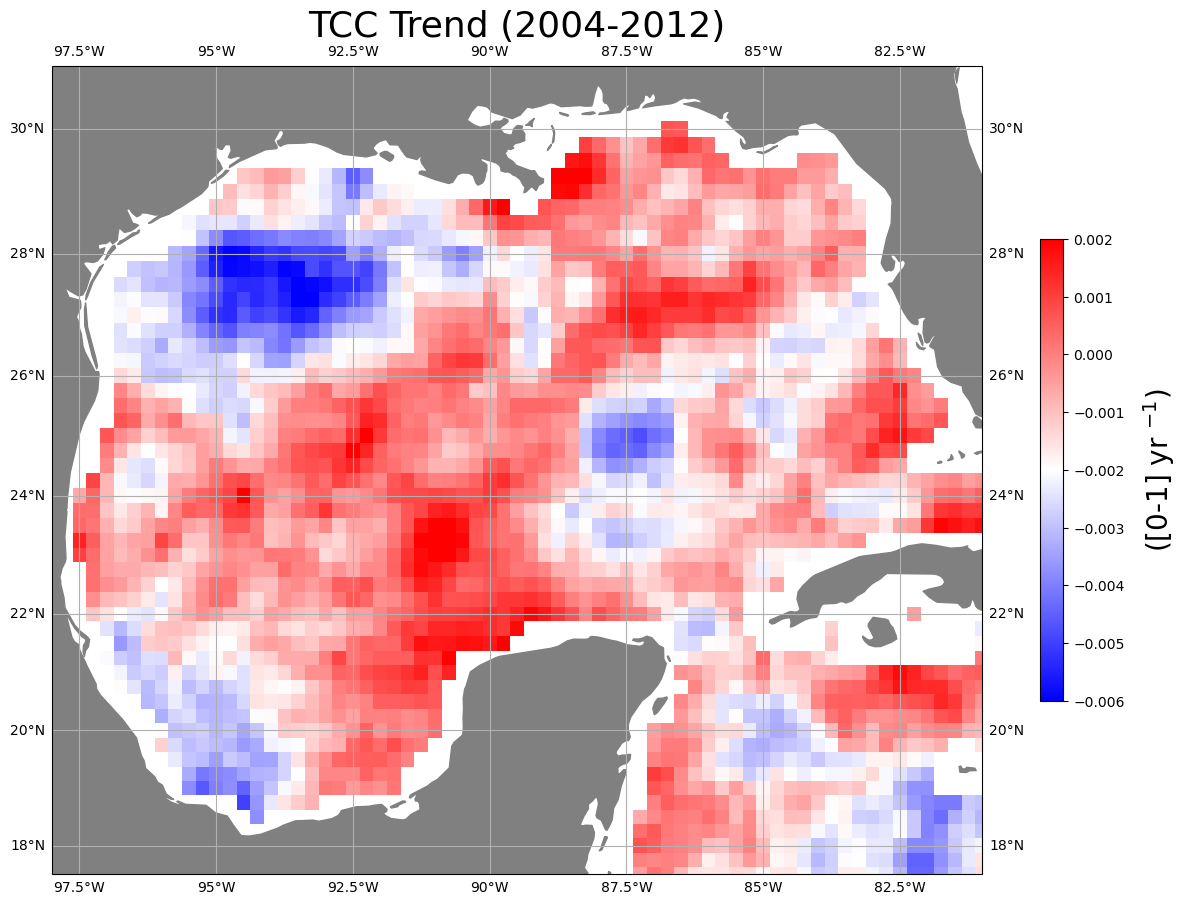

In [59]:
plot_trend(trend_lcc_0412, 'TCC Trend (2004-2012)', '([0-1] yr $^{-1}$)', -0.006, 0.002)

## Trend maps of anomalies

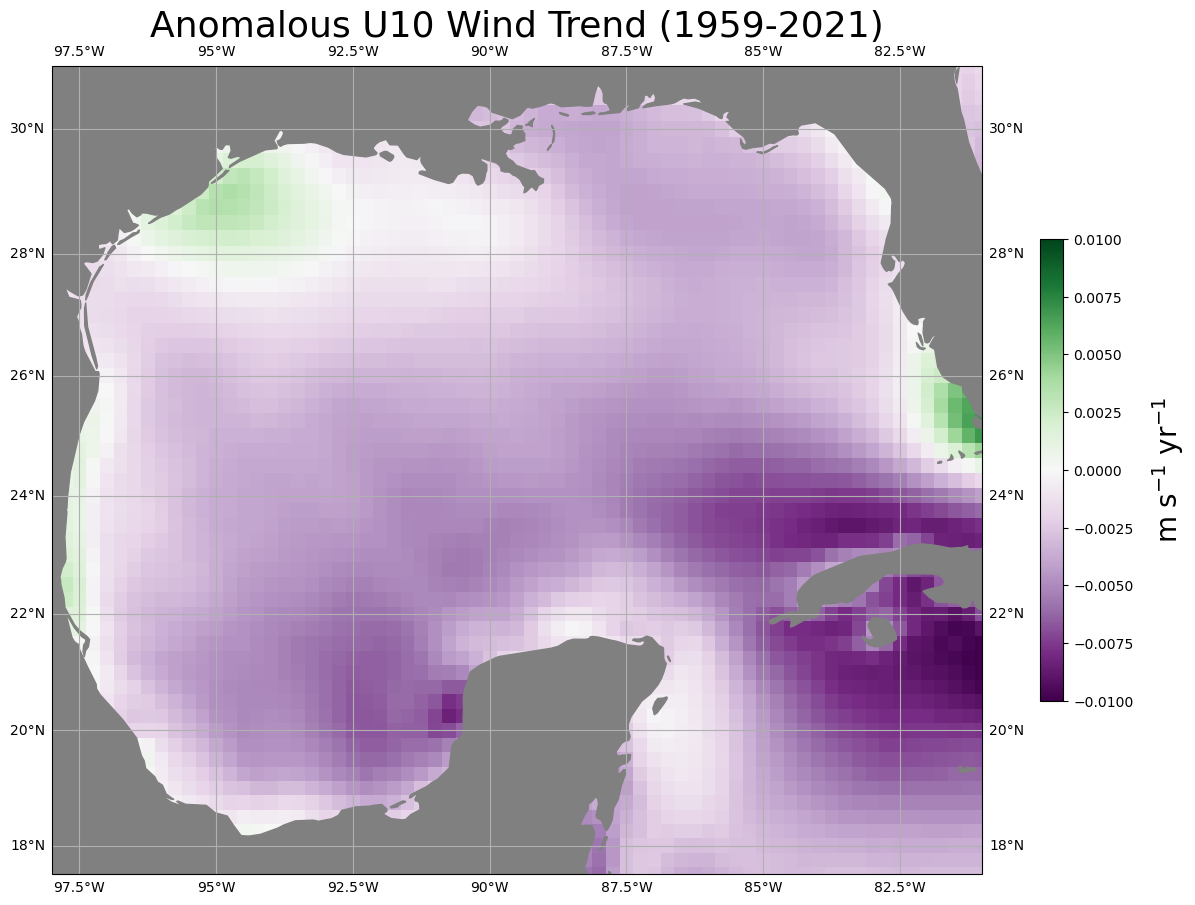

In [46]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_u.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.01, vmax=0.01)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"m s$^{-1}$ yr$^{-1}$", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous U10 Wind Trend (1959-2021)', fontsize=26);

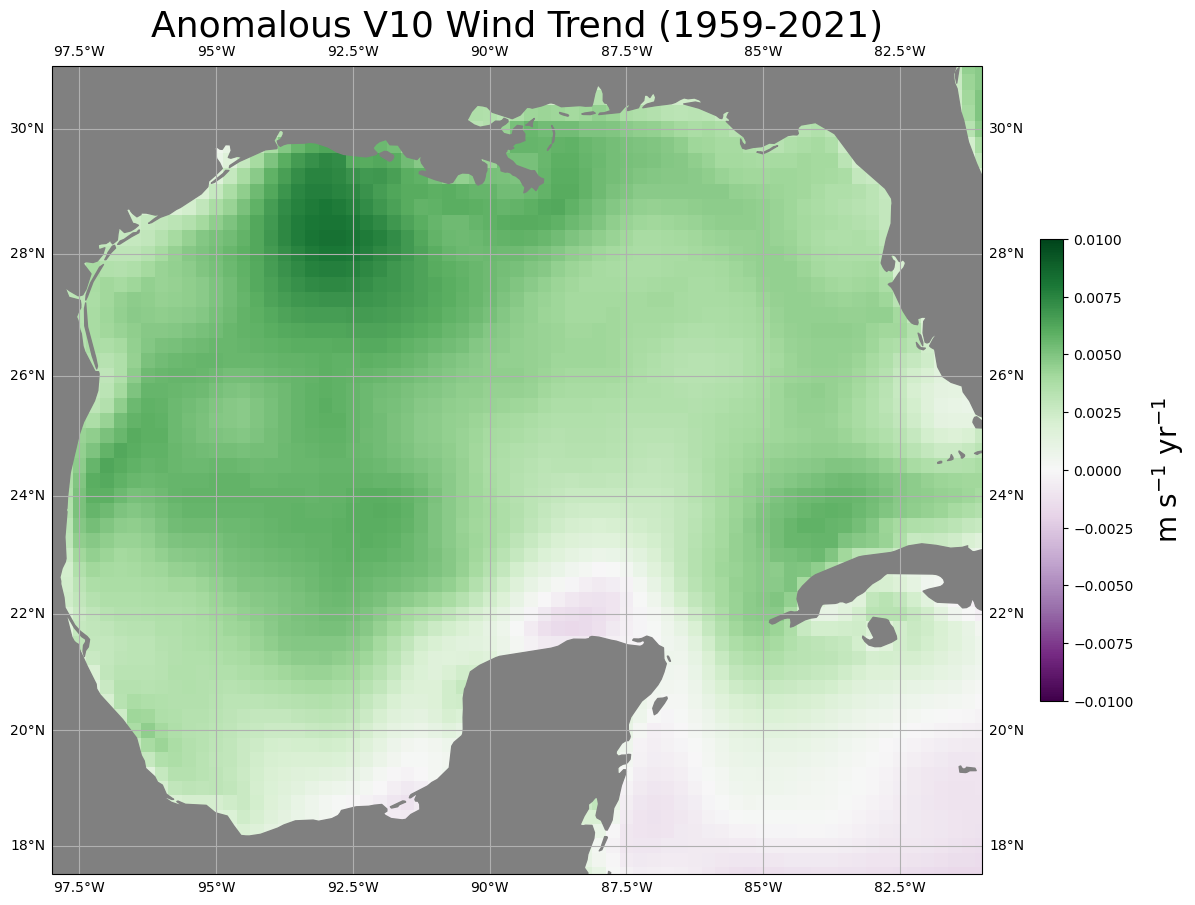

In [47]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_v.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.01, vmax=0.01)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"m s$^{-1}$ yr$^{-1}$", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous V10 Wind Trend (1959-2021)', fontsize=26);

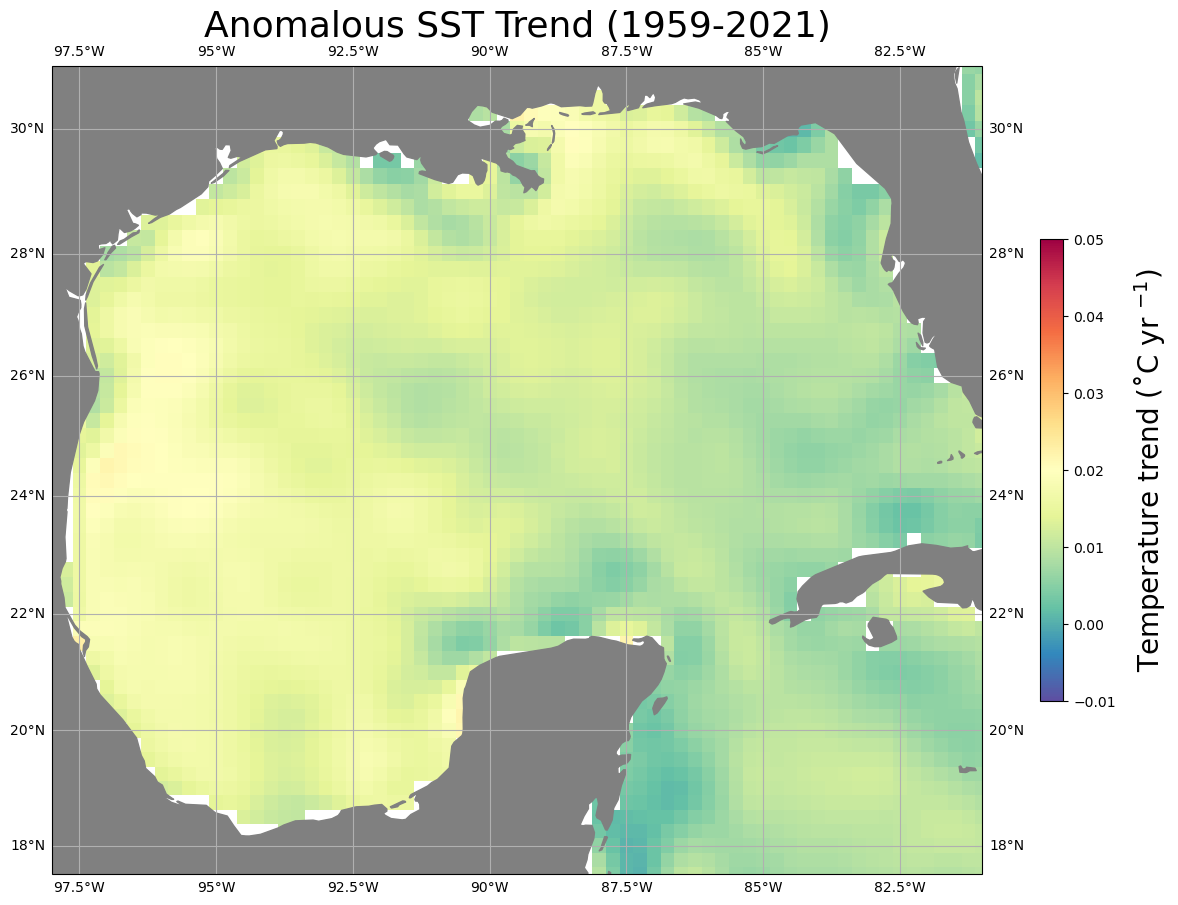

In [36]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_sst.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Spectral_r', vmin=-0.01, vmax=0.05)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous SST Trend (1959-2021)', fontsize=26);

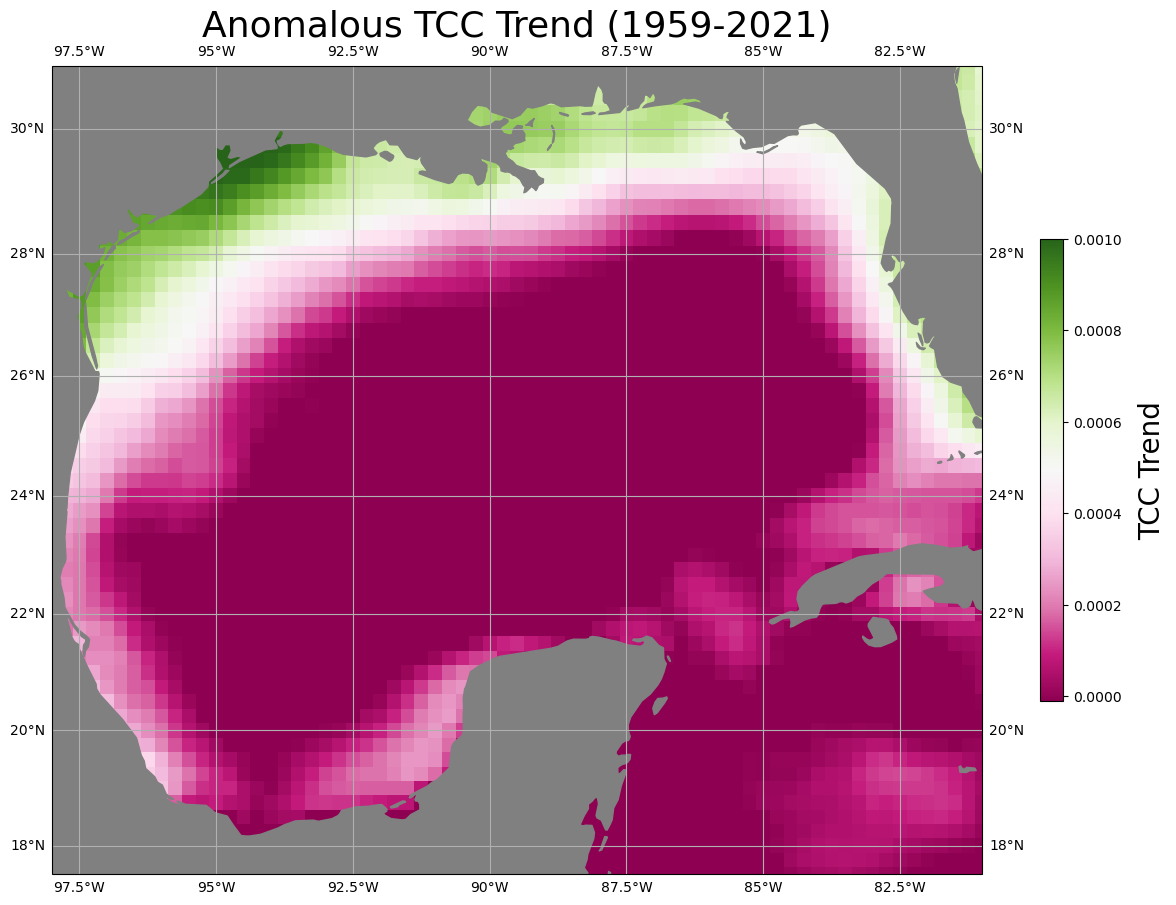

In [37]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_tcc.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PiYG', vmin=-1e-5, vmax=1e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("TCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous TCC Trend (1959-2021)', fontsize=26);

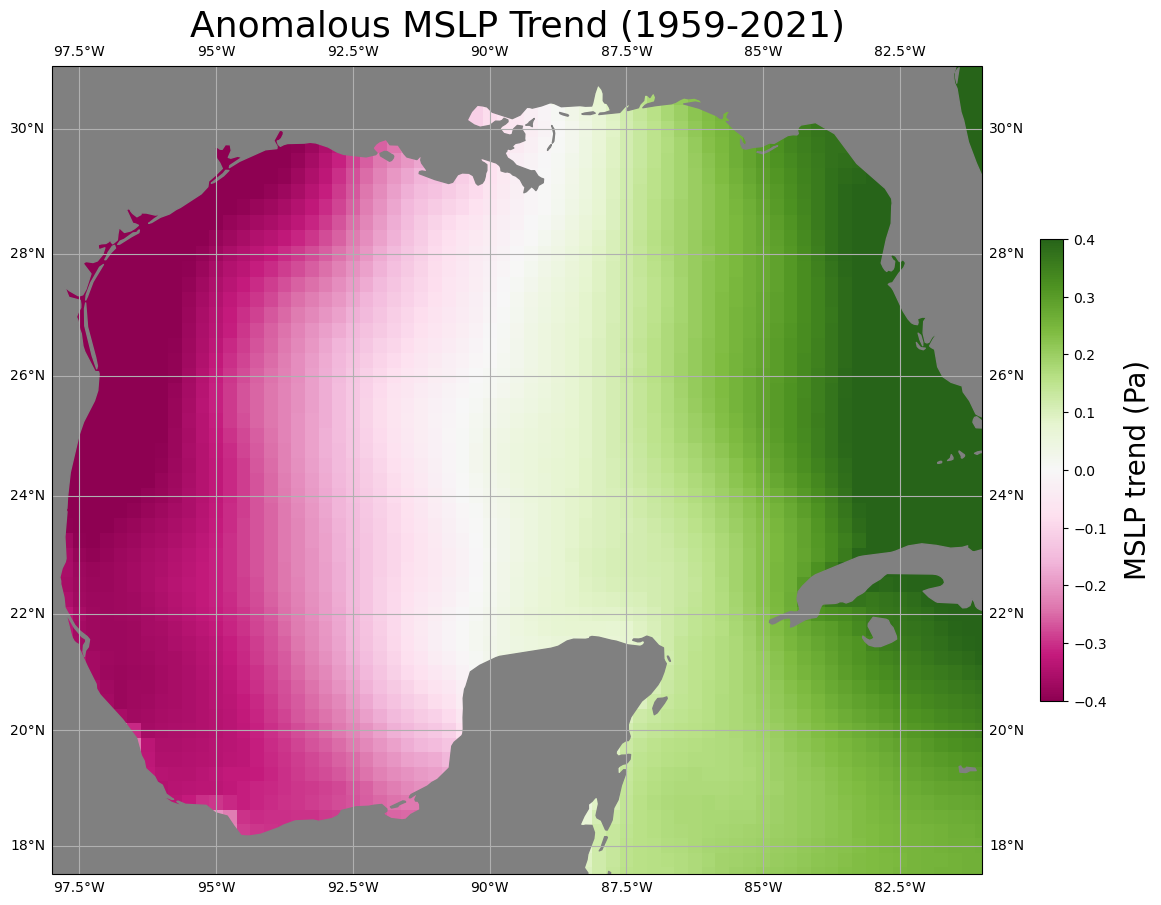

In [38]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_mslp.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PiYG', vmin=-0.4, vmax=0.4)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("MSLP trend (Pa)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous MSLP Trend (1959-2021)', fontsize=26);

## Trend maps from 1993-2021

In [8]:
t = sst.groupby('time.year').mean('time').polyfit('year', deg=1, cov=True, skipna=True)

In [12]:
np.sqrt(t.polyfit_covariance)

<xarray.DataArray 'polyfit_covariance' (cov_i: 2, cov_j: 2, latitude: 55,
                                        longitude: 69)> Size: 121kB
dask.array<sqrt, shape=(2, 2, 55, 69), dtype=float64, chunksize=(2, 2, 55, 69), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
Dimensions without coordinates: cov_i, cov_j

In [9]:
coeffs, cov_matrix = np.polyfit(sst.time.values, sst, 1, cov=True)

# Coefficients
slope, intercept = coeffs

# Standard errors of the coefficients
std_errors = np.sqrt(np.diag(cov_matrix))

print(f"Slope: {slope}, Intercept: {intercept}")
print(f"Standard errors: {std_errors}")

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [ ]:

# Degrees of freedom: number of data points minus number of parameters
df = len(x) - 2  # For linear fit, 2 parameters

# Compute t-statistics
t_stats = coeffs / std_errors

# Compute p-values
p_values = [2 * (1 - stats.t.cdf(abs(t), df)) for t in t_stats]

print(f"t-statistics: {t_stats}")
print(f"p-values: {p_values}")

In [6]:
#linear regression at every grid cell over time, so that we see trend rate at each grid pt
# Calculate the linear trend at each grid point
trend_sst_9321 = sst.groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_tcc_9321 = tcc.groupby('time.year').mean('time').polyfit('year', deg=1) #(0-1)/yr
trend_u10_9321 = u10.groupby('time.year').mean('time').polyfit('year', deg=1) # m/s/yr
trend_v10_9321 = v10.groupby('time.year').mean('time').polyfit('year', deg=1) # m/s/yr
trend_mslp_9321 = mslp.groupby('time.year').mean('time').polyfit('year', deg=1) # Pa/yr
trend_lcc_9321 = lcc.groupby('time.year').mean('time').polyfit('year', deg=1) #(0-1)/yr

In [7]:
trend_sst_9321

<xarray.Dataset> Size: 61kB
Dimensions:               (degree: 2, latitude: 55, longitude: 69)
Coordinates:
  * degree                (degree) int64 16B 1 0
  * longitude             (longitude) float32 276B 262.0 262.2 ... 278.8 279.0
  * latitude              (latitude) float32 220B 31.0 30.75 30.5 ... 17.75 17.5
Data variables:
    polyfit_coefficients  (degree, latitude, longitude) float64 61kB dask.array<chunksize=(2, 55, 69), meta=np.ndarray>

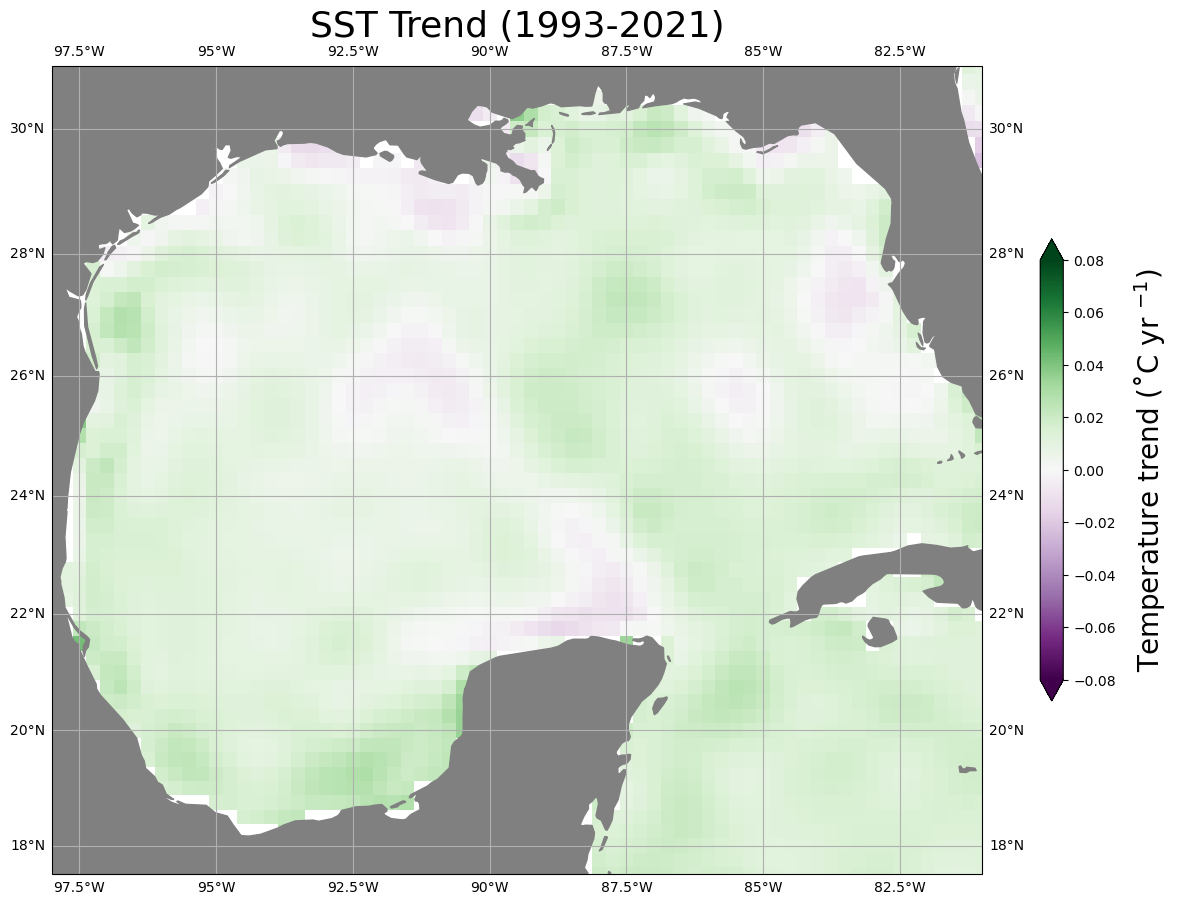

In [11]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_sst_9321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.08, vmax=0.08)
cb = fig.colorbar(im, ax=ax, shrink=0.4, extend='both')
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Trend (1993-2021)', fontsize=26);

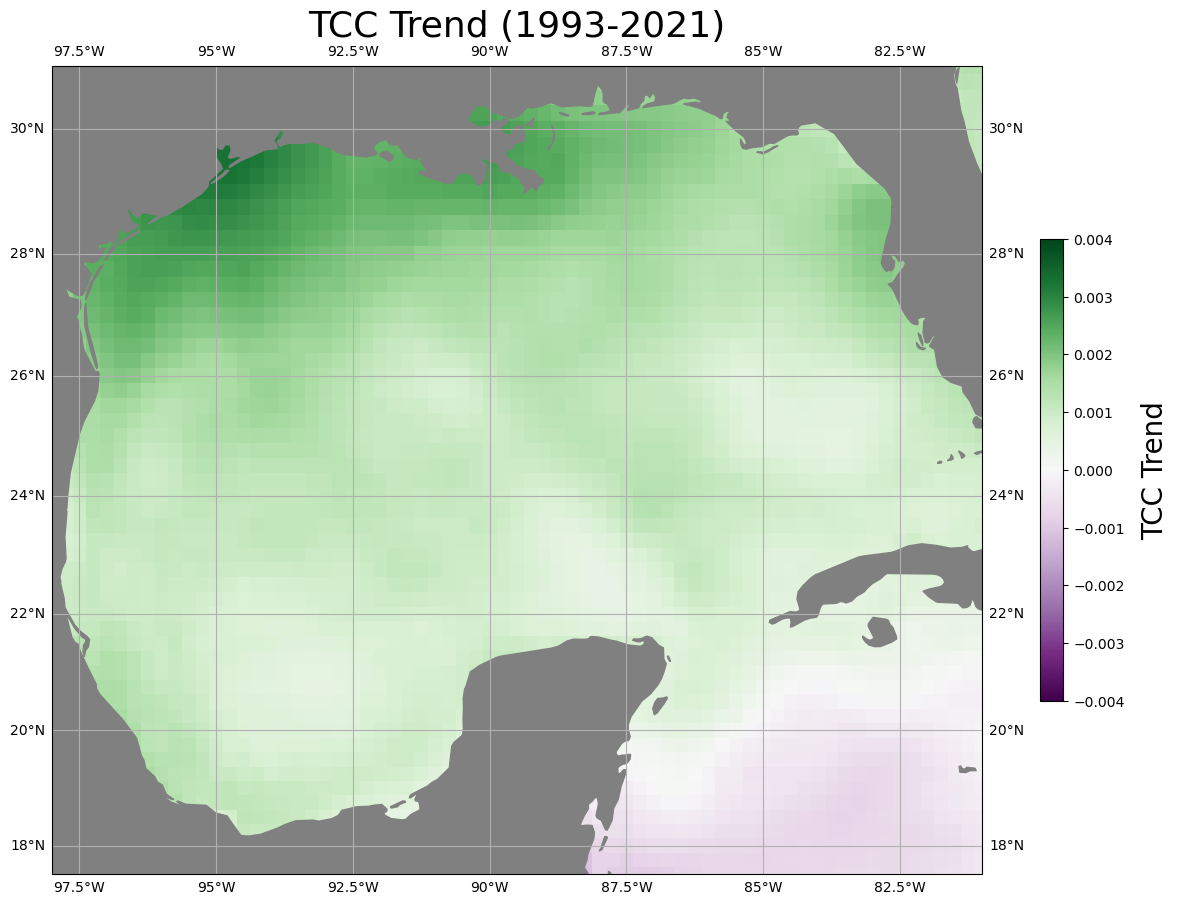

In [12]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_tcc_9321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-4e-3, vmax=4e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("TCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('TCC Trend (1993-2021)', fontsize=26);

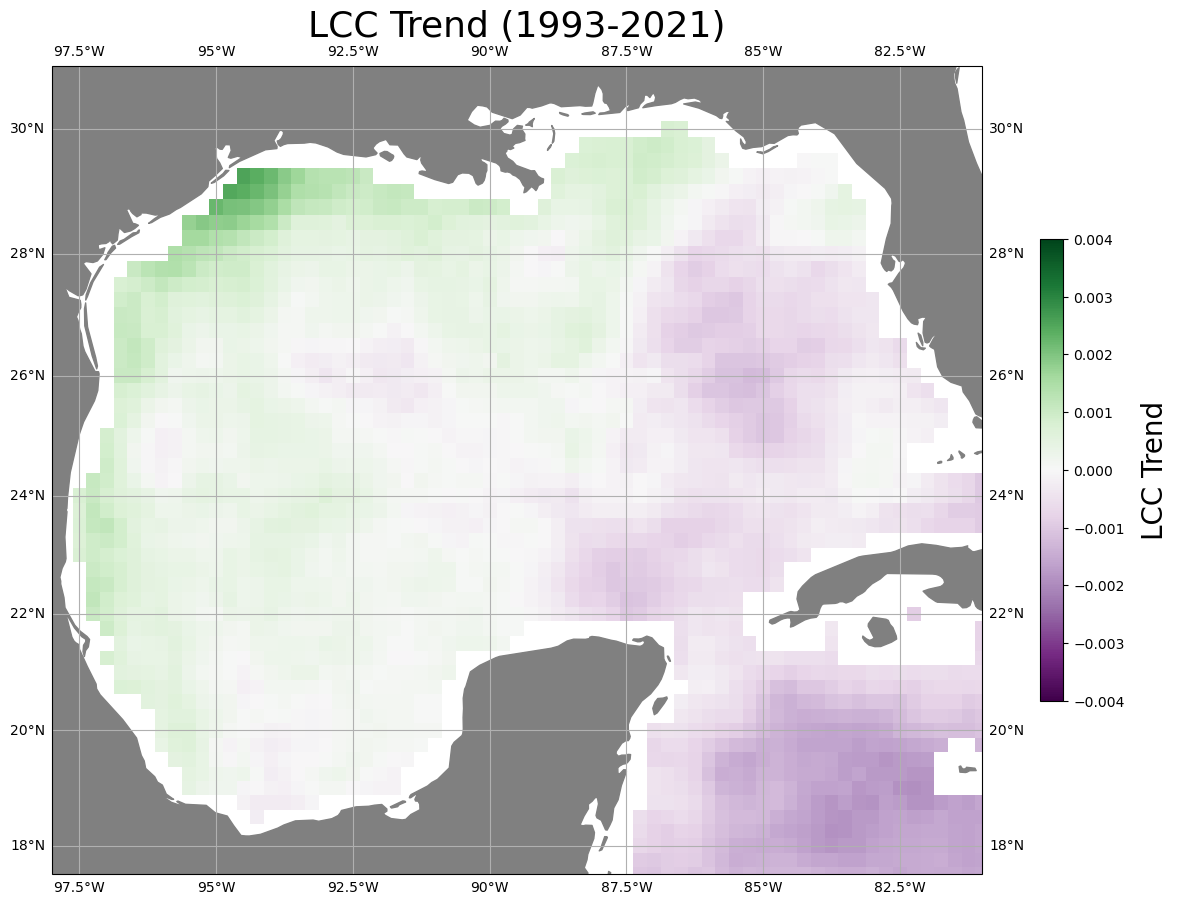

In [19]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_lcc_9321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-4e-3, vmax=4e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("LCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('LCC Trend (1993-2021)', fontsize=26);

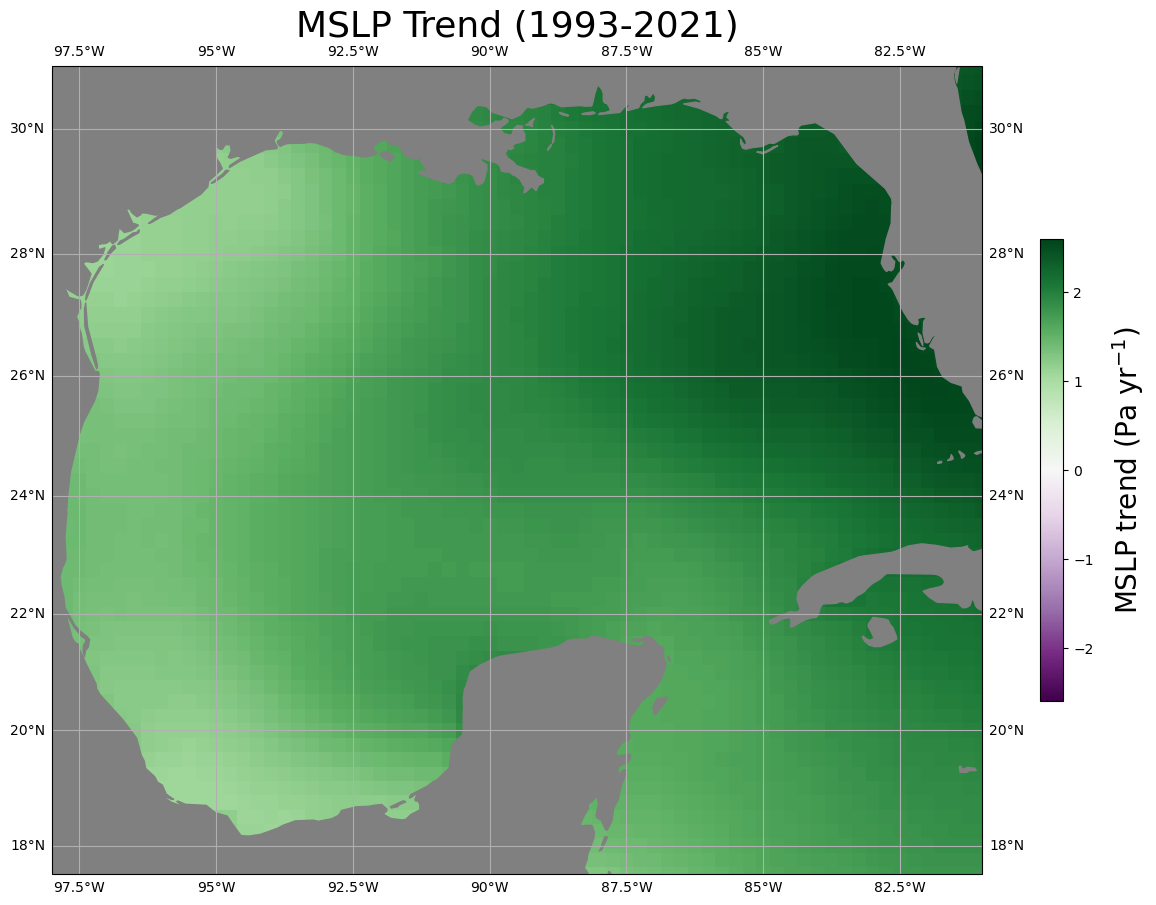

In [31]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_mslp_9321.polyfit_coefficients[0]
norm = colors.CenteredNorm()
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', norm=norm)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("MSLP trend (Pa yr$^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('MSLP Trend (1993-2021)', fontsize=26);

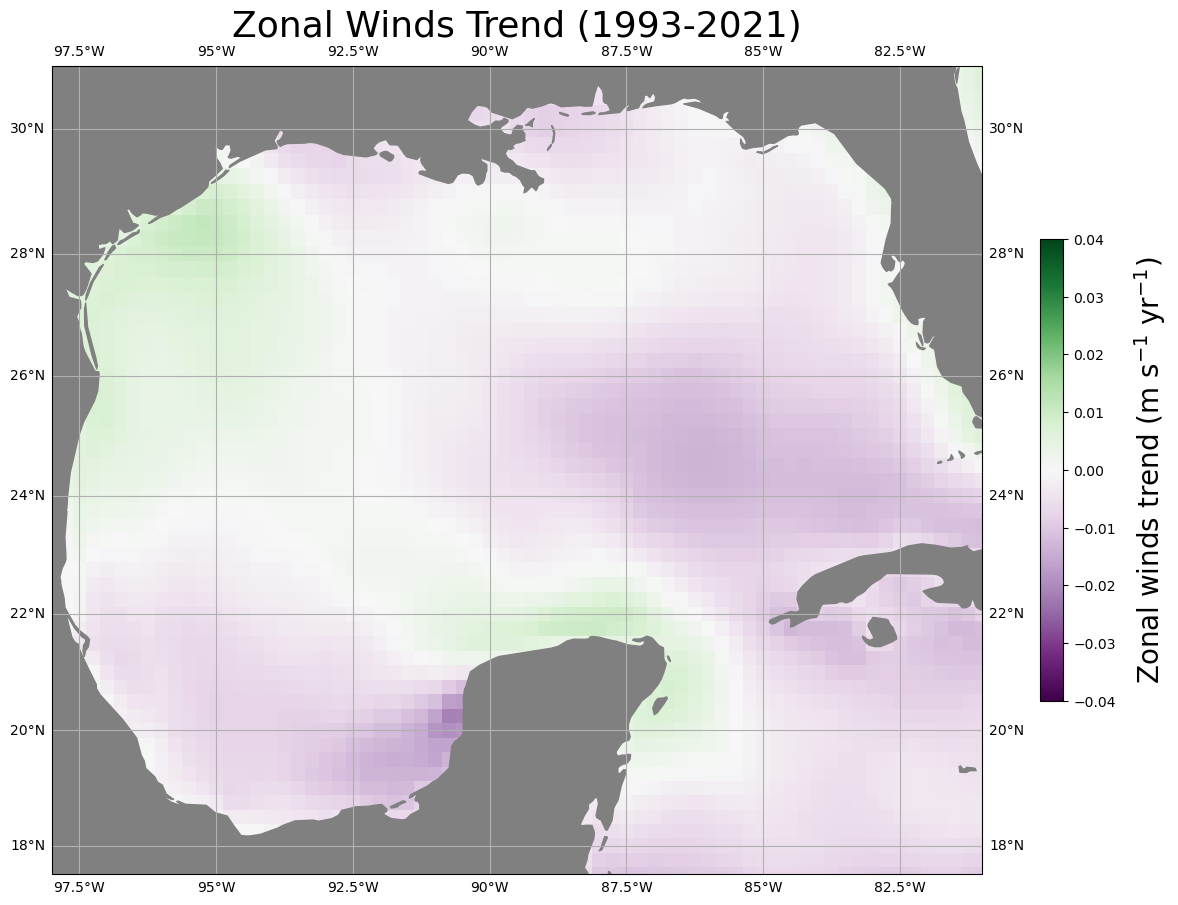

In [33]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_u10_9321.polyfit_coefficients[0]
norm = colors.CenteredNorm()
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.04, vmax=0.04)#norm=norm)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("Zonal winds trend (m s$^{-1}$ yr$^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Zonal Winds Trend (1993-2021)', fontsize=26);

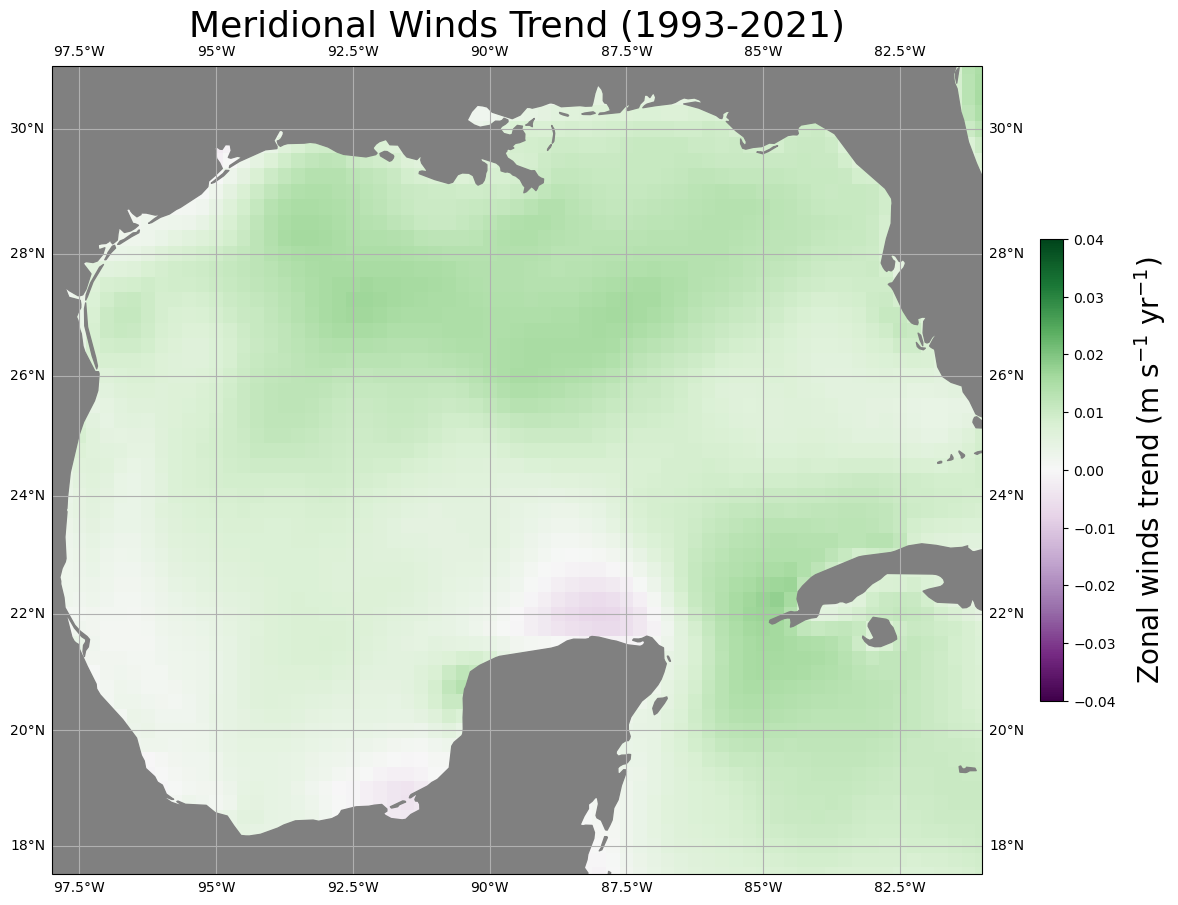

In [34]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_v10_9321.polyfit_coefficients[0]
norm = colors.CenteredNorm()
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.04, vmax=0.04)#norm=norm)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("Zonal winds trend (m s$^{-1}$ yr$^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Meridional Winds Trend (1993-2021)', fontsize=26);

## Calculate trends from 1983-2021

In [29]:
#linear regression at every grid cell over time, so that we see trend rate at each grid pt
# Calculate the linear trend at each grid point
trend_sst_8321 = sst.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_tcc_8321 = tcc.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_u10_8321 = u10.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)
trend_v10_8321 = v10.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)
trend_mslp_8321 = mslp.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)

KeyboardInterrupt: 

In [49]:
u10_anom

<xarray.DataArray '10m_u_component_of_wind' (time: 552264, latitude: 55,
                                             longitude: 69)> Size: 8GB
array([[[  1.8248231 ,   1.7870414 ,   1.7725568 , ...,  -6.1955094 ,
          -9.032493  ,  -9.465136  ],
        [  1.8474281 ,   1.8155588 ,   1.7911866 , ...,  -5.8764772 ,
          -9.074341  , -10.112228  ],
        [  1.9550784 ,   1.8676544 ,   1.7812744 , ...,  -5.943328  ,
          -9.210593  , -10.750723  ],
        ...,
        [  3.895605  ,   4.4390545 ,   1.7268584 , ...,   0.25675678,
           0.32551718,   0.40015125],
        [  2.5061693 ,   3.0501542 ,   2.2919736 , ...,   0.44289255,
           0.5042496 ,   0.55668354],
        [  1.595101  ,   2.2526238 ,   1.6274388 , ...,   0.42231703,
           0.45874882,   0.45539236]],

       [[  1.7437829 ,   1.4801515 ,   1.3534063 , ...,  -6.069299  ,
          -8.803987  ,  -9.334276  ],
        [  1.5405382 ,   1.4495494 ,   1.3361658 , ...,  -6.091034  ,
          -8.823914  ,  -9.875086  ],
        [  1.5352637 ,   1.3986841 ,   1.3010117 , ...,  -6.517252  ,
          -9.293626  , -10.485682  ],
...
        [  3.8057055 ,   4.814938  ,   3.3401303 , ...,  -1.3455114 ,
          -1.2611628 ,  -1.1700644 ],
        [  2.5622065 ,   3.5726223 ,   3.4492645 , ...,  -1.350512  ,
          -1.2170548 ,  -1.1397376 ],
        [  2.0502064 ,   3.0604067 ,   3.1024528 , ...,  -1.4102993 ,
          -1.2739367 ,  -1.2092428 ]],

       [[ -0.79417807,  -0.8133242 ,  -0.78334224, ...,   1.7594442 ,
           2.9294176 ,   2.620281  ],
        [ -0.6179383 ,  -0.7579064 ,  -0.8124119 , ...,   1.4949054 ,
           2.1833029 ,   1.8013806 ],
        [ -0.6123183 ,  -0.7428984 ,  -0.87523425, ...,   0.93366426,
           1.1548083 ,   0.51429033],
        ...,
        [  3.6984406 ,   4.774903  ,   3.2238007 , ...,  -1.2873468 ,
          -1.2732487 ,  -1.1632657 ],
        [  2.4549415 ,   3.5325868 ,   3.3238704 , ...,  -1.3558002 ,
          -1.2510476 ,  -1.1563554 ],
        [  1.8145258 ,   2.9961987 ,   3.0057635 , ...,  -1.4631767 ,
          -1.3358788 ,  -1.2462568 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 4MB 1959-01-01 ... 2021-12-31T23:00:00
    dayofyear  (time) int64 4MB 1 1 1 1 1 1 1 1 ... 365 365 365 365 365 365 365

In [50]:
#linear regression at every grid cell over time, so that we see trend rate at each grid pt
# Calculate the linear trend at each grid point
trend_anom_sst_8321 = sst_anom.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_anom_tcc_8321 = tcc_anom.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)
trend_anom_u10_8321 = u_anom.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)
trend_anom_v10_8321 = v_anom.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)
trend_anom_mslp_8321 = mslp_anom.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)

NameError: name 'u_anom' is not defined

## Trend maps (1983-2021)

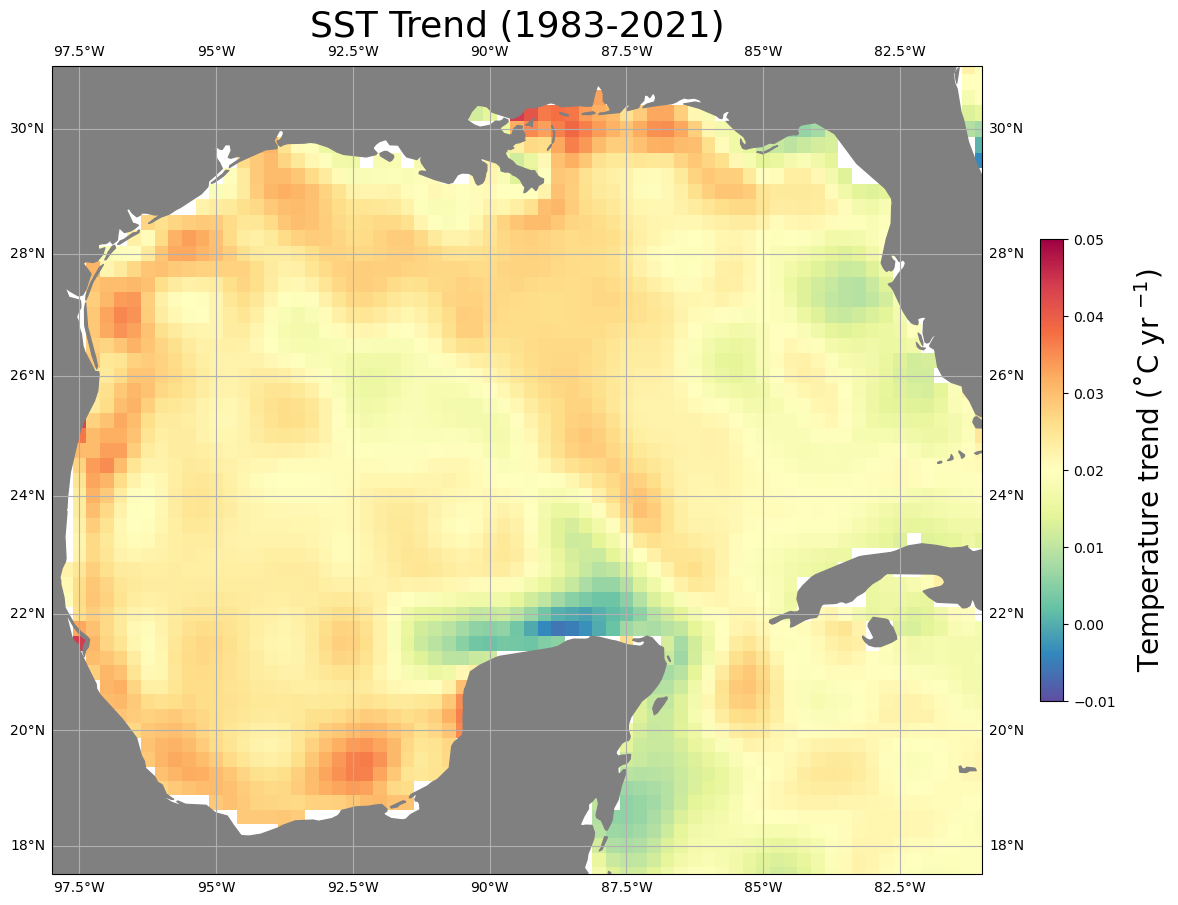

In [46]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_sst_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Spectral_r', vmin=-0.01, vmax=0.05)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Trend (1983-2021)', fontsize=26);

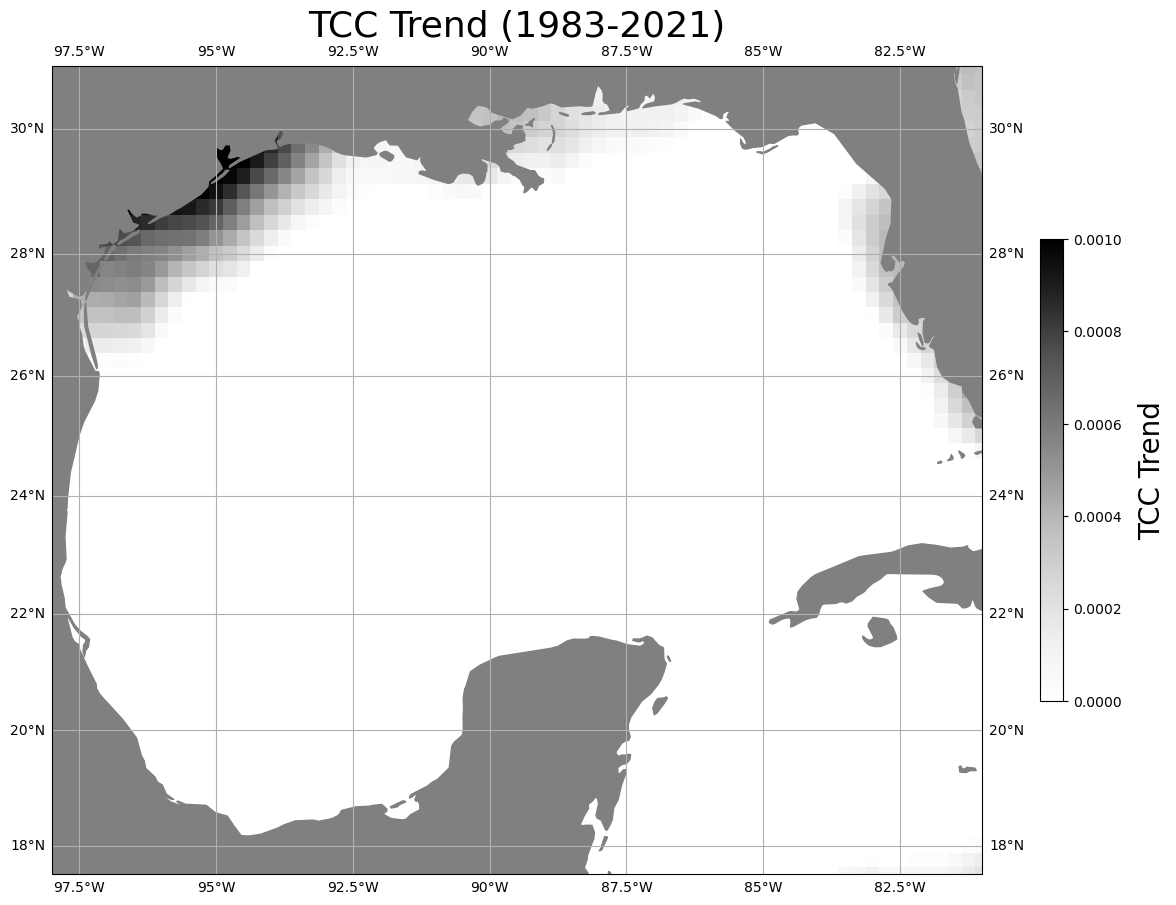

In [56]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_tcc_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Greys', vmin=0, vmax=1e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("TCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('TCC Trend (1983-2021)', fontsize=26);

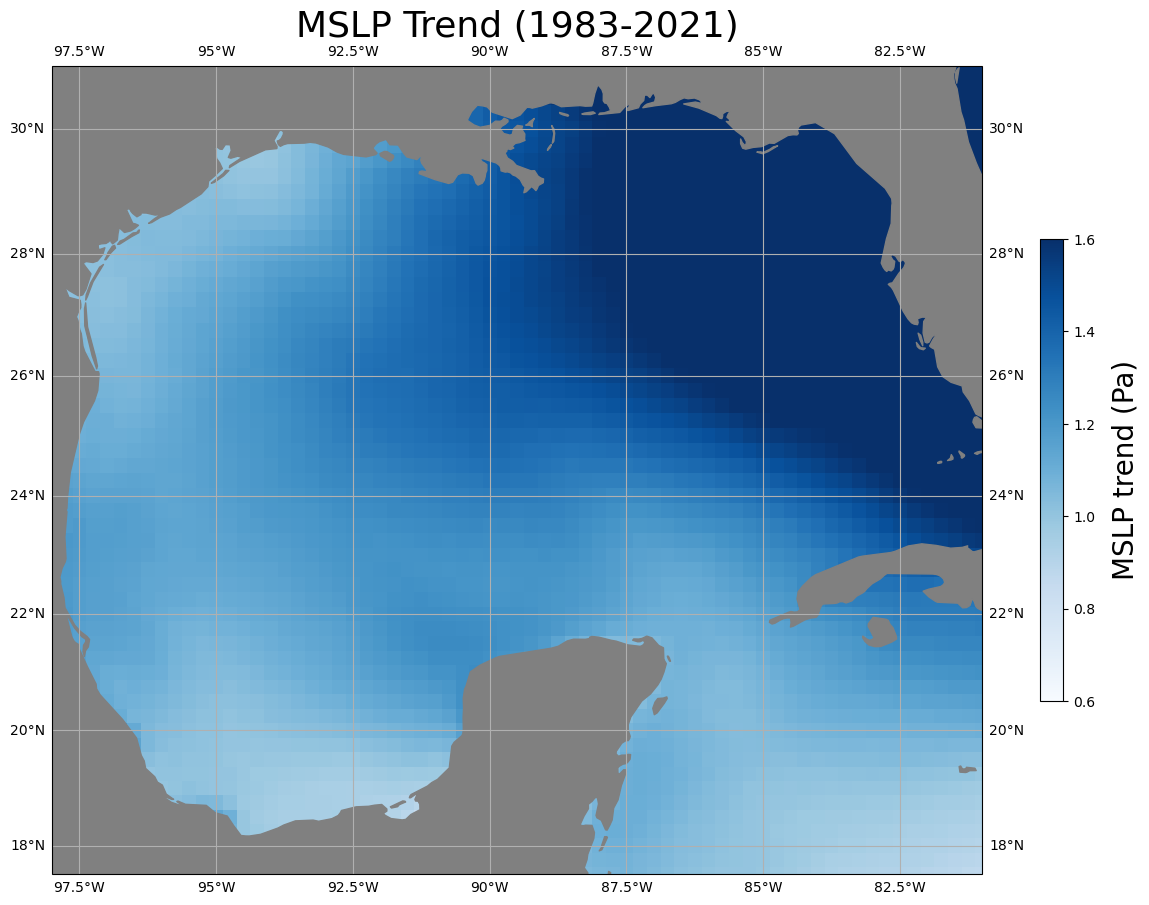

In [58]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_mslp_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Blues', vmin=0.6, vmax=1.6)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("MSLP trend (Pa)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('MSLP Trend (1983-2021)', fontsize=26);

## Trend maps of anomalies (1983-2021)

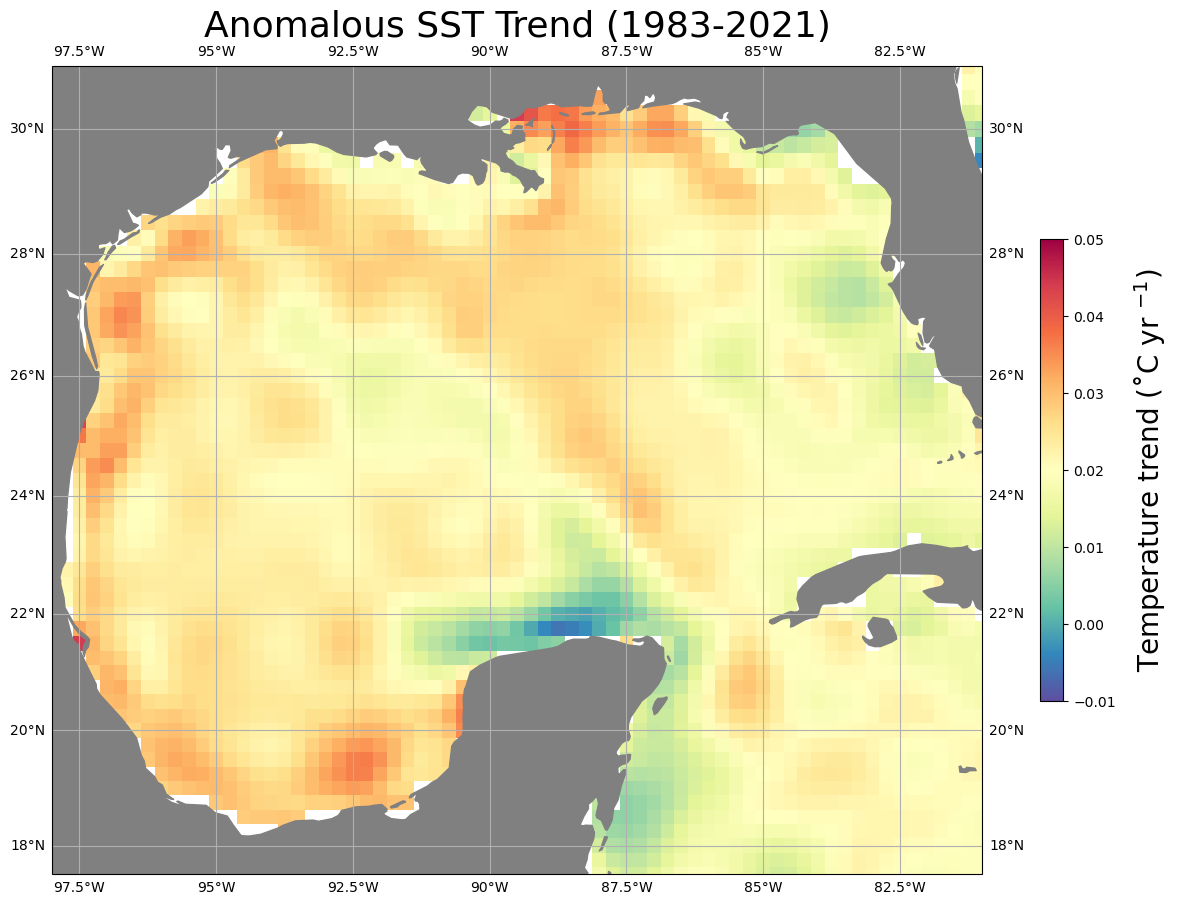

In [59]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_sst_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Spectral_r', vmin=-0.01, vmax=0.05)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous SST Trend (1983-2021)', fontsize=26);

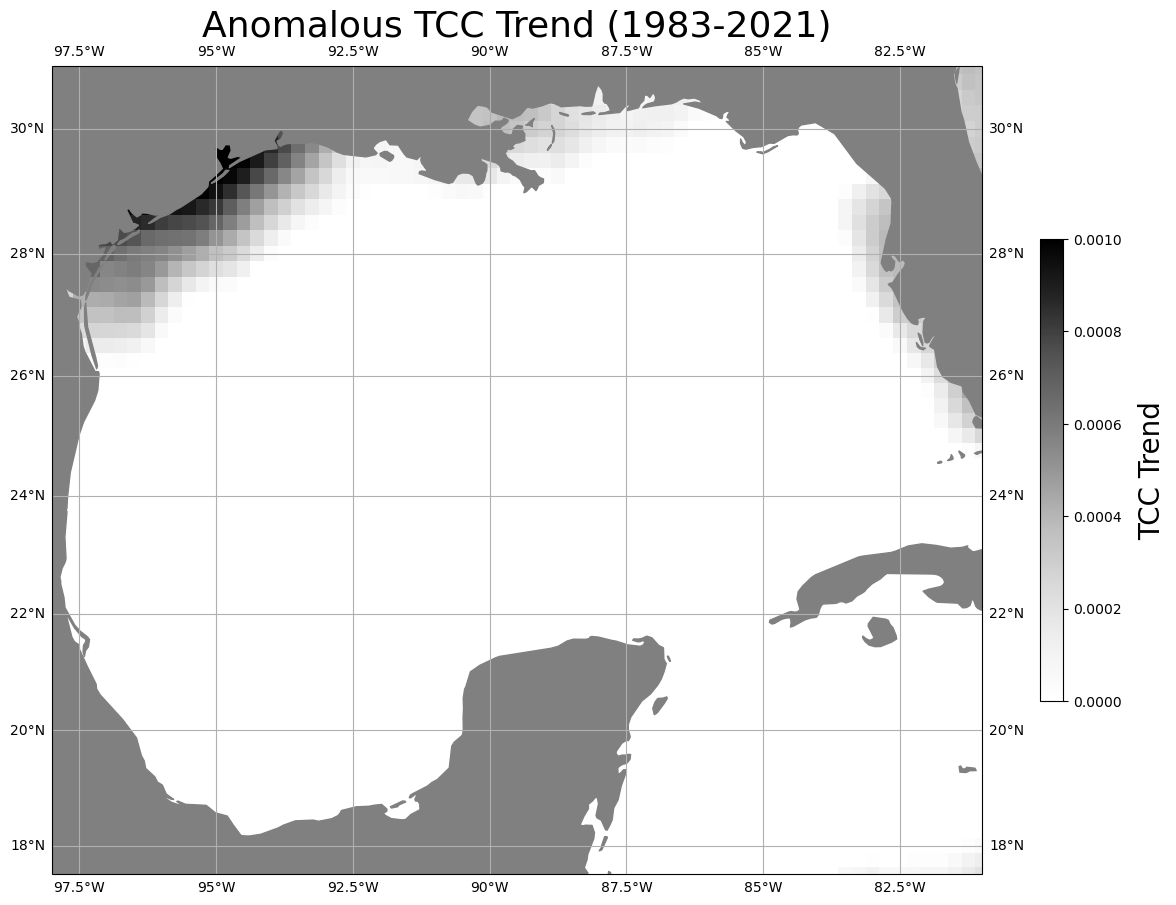

In [61]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_tcc_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Greys', vmin=0, vmax=1e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("TCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous TCC Trend (1983-2021)', fontsize=26);

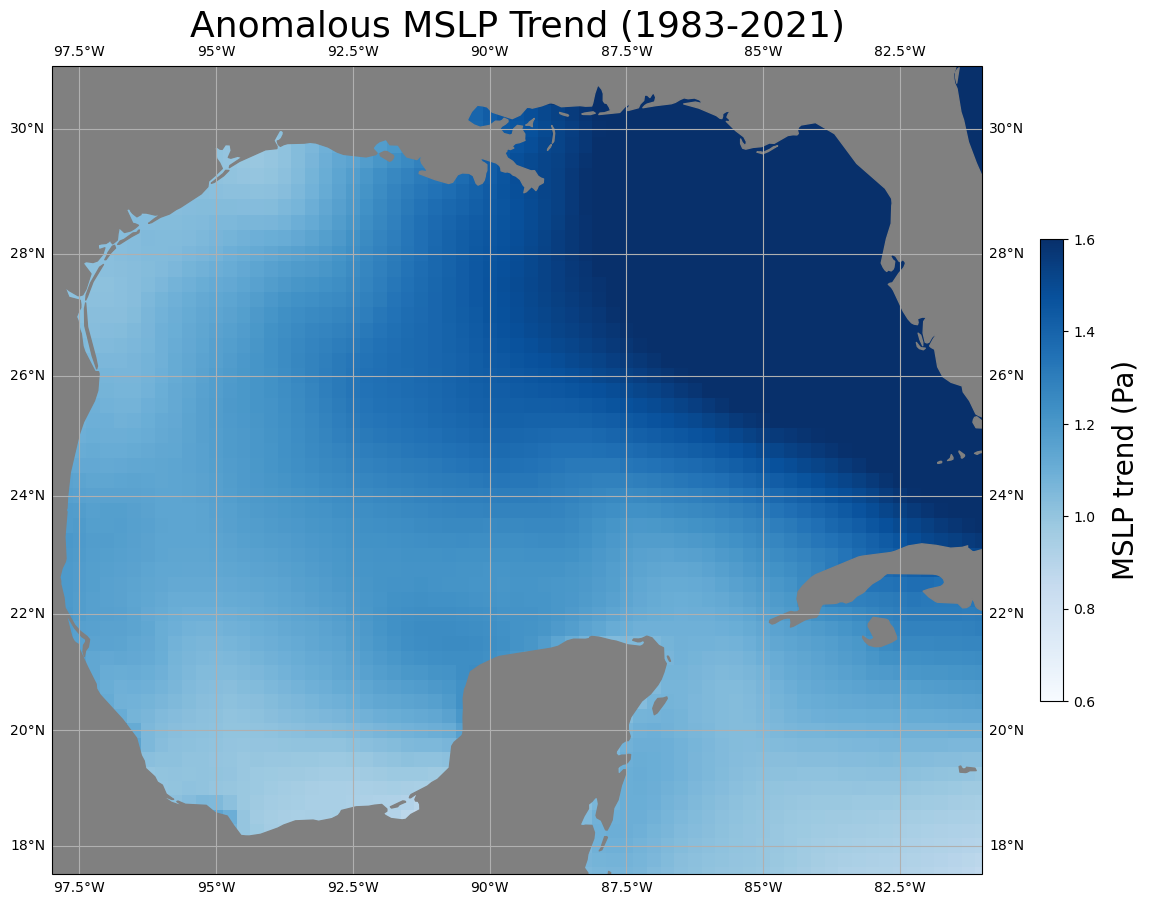

In [63]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_mslp_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Blues', vmin=0.6, vmax=1.6)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("MSLP trend (Pa)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous MSLP Trend (1983-2021)', fontsize=26);